# Linear Bivariate BMM with calibration of Coleman toy models.

The best way to learn Taweret is to use it. You can run, modify and experiment with this notebook [here.](https://mybinder.org/v2/gh/danOSU/Taweret/c2d8fd3ce3d74a5891d51adb5afc0afa0b503127?urlpath=lab%2Ftree%2Fdocs%2Fsource%2Fnotebooks%2FLinear_BMM_with_cdf_function_for_coleman_models.ipynb)


The models can be found in Coleman Thesis : https://go.exlibris.link/3fVZCfhl

This notebook shows how to use the Bayesian model mixing package **Taweret** for a toy problem. 

**Author : Dan Liyanage**

Date : 11/13/2022

In [1]:
import sys

# You will have to change the following imports depending on where you have 
# the packages installed

# If using binder please uncomment the following.
sys.path.append("/home/jovyan/")

#sys.path.append("/Users/dananjayaliyanage/git/Taweret")

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
# To define priors. (uncoment if not using default priors)
#import bilby

# For other operations
import numpy as np

In [2]:
# Import models with a predict method
from Taweret.models import coleman_models as toy_models

m1 = toy_models.coleman_model_1()
m2 = toy_models.coleman_model_2()
truth = toy_models.coleman_truth()

In [3]:
g = np.linspace(-1,9,10)
plot_g = np.linspace(-1,9,100)
true_output = truth.evaluate(plot_g)
exp_data = truth.evaluate(g)

## 1. The models and the experimental data.

Truth
 
$f(x) = 2-0.1(x-4)^2$, where $x \in [-1, 9]$

Model 1

$f_1(x,\theta)= 0.5(x+\theta)-2$    , where $\theta \in [1, 6]$

Model 2

$f_2(x,\theta)= -0.5(x-\theta) + 3.7$   , where $\theta \in [-2, 3]$

Experimental data 

sampled from the Truth with a fixed standard deviation of 0.3




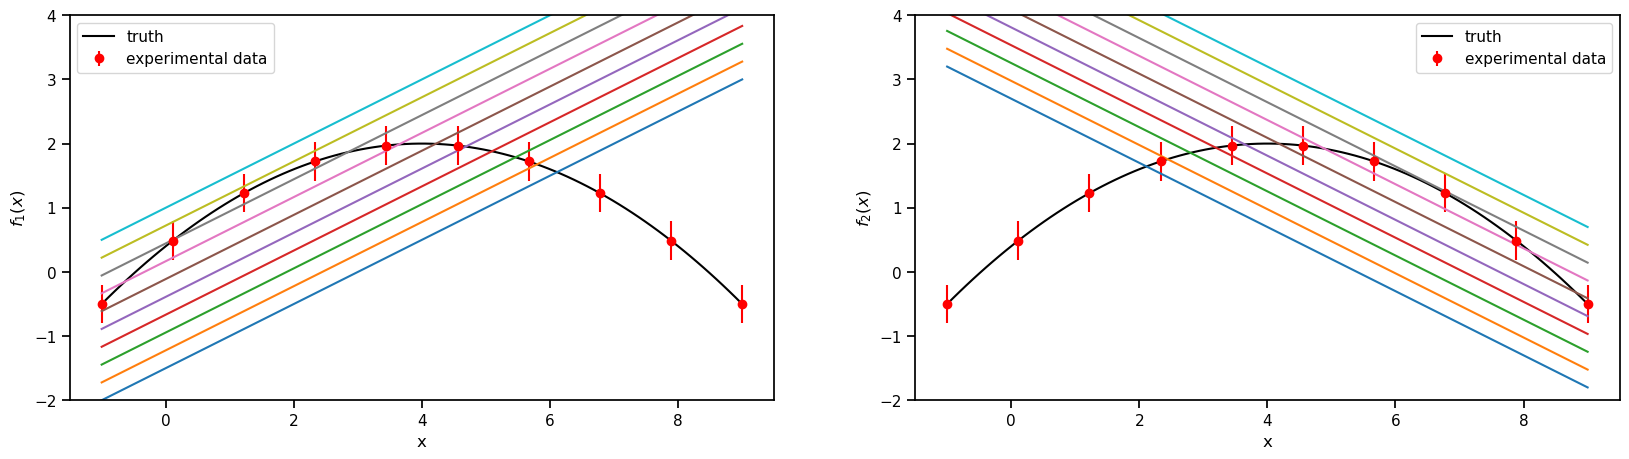

In [4]:
sns.set_context('notebook')
fig, axs = plt.subplots(1,2,figsize=(20,5))
prior_ranges = [(1,6), (-2,3)]
for i in range(0,2):
    ax = axs.flatten()[i]
    ax.plot(plot_g, true_output[0], label='truth', color='black')
    ax.errorbar(g,exp_data[0],exp_data[1], fmt='o', label='experimental data', color='r')
    ax.legend()
    ax.set_ylim(-2,4)
    for value in np.linspace(*prior_ranges[i],10):
        if i==0:
            predict_1 = m1.evaluate(plot_g, value)
            ax.plot(plot_g, predict_1[0])
            ax.set_ylabel(r'$f_1(x)$')
        if i==1:
            predict_2 = m2.evaluate(plot_g, value)
            ax.plot(plot_g, predict_2[0])      
            ax.set_ylabel(r'$f_2(x)$')    
    ax.set_xlabel('x') 
    


##  2. Choose a Mixing method

In [5]:
# Mixing method
from Taweret.mix.bivariate_linear import BivariateLinear as BL

models= {'model1':m1,'model2':m2}
mix_model = BL(models_dic=models, method='cdf', nargs_model_dic={'model1':1, 'model2':1})

cdf mixing function has 2 free parameter(s)
To change the prior use `set_prior` method
Using default priors for model 1
{'model1_0': Uniform(minimum=1, maximum=6, name='model1_0', latex_label='model1_0', unit=None, boundary=None)}
Using default priors for model 2
{'model2_0': Uniform(minimum=-2, maximum=3, name='model2_0', latex_label='model2_0', unit=None, boundary=None)}


In [6]:
## uncoment to change the prior from the default
import bilby 

priors = bilby.core.prior.PriorDict()
priors['cdf_0'] = bilby.core.prior.Normal(0, 1, name="cdf_0")
priors['cdf_1'] = bilby.core.prior.Normal(0, 1, name="cdf_1")
mix_model.set_prior(priors)

{'cdf_0': Normal(mu=0, sigma=1, name='cdf_0', latex_label='cdf_0', unit=None, boundary=None),
 'cdf_1': Normal(mu=0, sigma=1, name='cdf_1', latex_label='cdf_1', unit=None, boundary=None),
 'model1_0': Uniform(minimum=1, maximum=6, name='model1_0', latex_label='model1_0', unit=None, boundary=None),
 'model2_0': Uniform(minimum=-2, maximum=3, name='model2_0', latex_label='model2_0', unit=None, boundary=None)}

In [7]:
mix_model.prior

{'cdf_0': Normal(mu=0, sigma=1, name='cdf_0', latex_label='cdf_0', unit=None, boundary=None),
 'cdf_1': Normal(mu=0, sigma=1, name='cdf_1', latex_label='cdf_1', unit=None, boundary=None),
 'model1_0': Uniform(minimum=1, maximum=6, name='model1_0', latex_label='model1_0', unit=None, boundary=None),
 'model2_0': Uniform(minimum=-2, maximum=3, name='model2_0', latex_label='model2_0', unit=None, boundary=None)}

## 3. Train to find posterior

In [8]:
result = mix_model.train(x_exp=g, y_exp=exp_data[0], y_err=exp_data[1], label='cdf_mix', outdir='outdir/coleman')

10:17 bilby INFO    : Running for label 'cdf_mix', output will be saved to 'outdir/coleman'
10:17 bilby INFO    : Search parameters:
10:17 bilby INFO    :   cdf_0 = Normal(mu=0, sigma=1, name='cdf_0', latex_label='cdf_0', unit=None, boundary=None)
10:17 bilby INFO    :   cdf_1 = Normal(mu=0, sigma=1, name='cdf_1', latex_label='cdf_1', unit=None, boundary=None)
10:17 bilby INFO    :   model1_0 = Uniform(minimum=1, maximum=6, name='model1_0', latex_label='model1_0', unit=None, boundary=None)
10:17 bilby INFO    :   model2_0 = Uniform(minimum=-2, maximum=3, name='model2_0', latex_label='model2_0', unit=None, boundary=None)
10:17 bilby INFO    : Single likelihood evaluation took 3.781e-04 s
10:17 bilby WARNING : Supplied argument 'printdt' not an argument of 'Ptemcee', removing.
10:17 bilby INFO    : Using sampler Ptemcee with kwargs {'ntemps': 5, 'nwalkers': 20, 'Tmax': 100, 'betas': None, 'a': 2.0, 'adaptation_lag': 10000, 'adaptation_time': 100, 'random': None, 'adapt': False, 'swap_rat

The following Default settings for sampler will be used. You can changethese arguments by providing kwargs_for_sampler argement in `train`.Check Bilby documentation for other sampling options.
{'sampler': 'ptemcee', 'ntemps': 5, 'nwalkers': 20, 'Tmax': 100, 'burn_in_fixed_discard': 200, 'nsamples': 5000, 'threads': 6, 'printdt': 60}


10:17 bilby INFO    : Generating pos0 samples
10:17 bilby INFO    : Starting to sample


1|0:00:00|nc:5.0e+02|a0:0.00-0.80|swp:0.32-0.71|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.29ms/ev
2|0:00:01|nc:1.0e+03|a0:0.30-0.80|swp:0.23-0.68|n:nan<5000|t!nan(+nan,+nan)|q:inf|1.39ms/ev
3|0:00:01|nc:1.5e+03|a0:0.40-0.73|swp:0.21-0.67|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.97ms/ev
4|0:00:01|nc:2.0e+03|a0:0.45-0.65|swp:0.19-0.68|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.91ms/ev
5|0:00:01|nc:2.5e+03|a0:0.44-0.68|swp:0.18-0.65|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.14ms/ev
6|0:00:01|nc:3.0e+03|a0:0.43-0.70|swp:0.18-0.66|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.16ms/ev
7|0:00:01|nc:3.5e+03|a0:0.40-0.71|swp:0.19-0.66|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.15ms/ev
8|0:00:01|nc:4.0e+03|a0:0.45-0.70|swp:0.20-0.66|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.13ms/ev
9|0:00:01|nc:4.5e+03|a0:0.42-0.67|swp:0.20-0.66|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.11ms/ev
10|0:00:01|nc:5.0e+03|a0:0.46-0.70|swp:0.20-0.66|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.10ms/ev
11|0:00:01|nc:5.5e+03|a0:0.44-0.67|swp:0.21-0.66|n:nan<5000|t!nan(+nan,+nan)|q:

90|0:00:06|nc:4.5e+04|a0:0.54-0.62|swp:0.25-0.69|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.12ms/ev
91|0:00:06|nc:4.6e+04|a0:0.54-0.63|swp:0.25-0.69|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.12ms/ev
92|0:00:06|nc:4.6e+04|a0:0.55-0.63|swp:0.25-0.69|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.12ms/ev
93|0:00:06|nc:4.6e+04|a0:0.54-0.63|swp:0.25-0.69|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.11ms/ev
94|0:00:06|nc:4.7e+04|a0:0.54-0.63|swp:0.25-0.69|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.11ms/ev
95|0:00:06|nc:4.8e+04|a0:0.55-0.63|swp:0.25-0.69|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.10ms/ev
96|0:00:06|nc:4.8e+04|a0:0.55-0.63|swp:0.25-0.69|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.10ms/ev
97|0:00:06|nc:4.8e+04|a0:0.54-0.63|swp:0.25-0.69|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.10ms/ev
98|0:00:06|nc:4.9e+04|a0:0.54-0.62|swp:0.25-0.69|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.11ms/ev
99|0:00:06|nc:5.0e+04|a0:0.54-0.62|swp:0.25-0.69|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.11ms/ev
100|0:00:06|nc:5.0e+04|a0:0.54-0.62|swp:0.25-0.69|n:nan<5000|t!nan(+na

178|0:00:11|nc:8.9e+04|a0:0.55-0.63|swp:0.26-0.68|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.13ms/ev
179|0:00:11|nc:9.0e+04|a0:0.55-0.63|swp:0.26-0.68|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.12ms/ev
180|0:00:11|nc:9.0e+04|a0:0.55-0.63|swp:0.26-0.68|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.12ms/ev
181|0:00:11|nc:9.0e+04|a0:0.55-0.63|swp:0.26-0.68|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.12ms/ev
182|0:00:11|nc:9.1e+04|a0:0.55-0.63|swp:0.26-0.68|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.12ms/ev
183|0:00:11|nc:9.2e+04|a0:0.55-0.63|swp:0.26-0.68|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.11ms/ev
184|0:00:11|nc:9.2e+04|a0:0.55-0.62|swp:0.26-0.68|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.12ms/ev
185|0:00:11|nc:9.2e+04|a0:0.55-0.62|swp:0.26-0.68|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.11ms/ev
186|0:00:11|nc:9.3e+04|a0:0.55-0.62|swp:0.26-0.68|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.12ms/ev
187|0:00:11|nc:9.4e+04|a0:0.55-0.62|swp:0.26-0.68|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.11ms/ev
188|0:00:12|nc:9.4e+04|a0:0.55-0.62|swp:0.26-0.68|n:nan<5000

265|0:00:16|nc:1.3e+05|a0:0.56-0.61|swp:0.26-0.67|n:-700<5000|t!2(+0.11,+0.05)|q:1.01|0.13ms/ev
266|0:00:16|nc:1.3e+05|a0:0.56-0.61|swp:0.26-0.67|n:-680<5000|t!2(+0.09,+0.03)|q:1.01|0.14ms/ev
267|0:00:16|nc:1.3e+05|a0:0.56-0.61|swp:0.26-0.67|n:-660<5000|t!2(+0.10,+0.02)|q:1.01|0.13ms/ev
268|0:00:17|nc:1.3e+05|a0:0.56-0.61|swp:0.26-0.67|n:-640<5000|t!2(+0.11,+0.06)|q:1.01|0.13ms/ev
269|0:00:17|nc:1.3e+05|a0:0.56-0.61|swp:0.26-0.67|n:-620<5000|t!2(+0.11,+0.08)|q:1.01|0.12ms/ev
270|0:00:17|nc:1.4e+05|a0:0.56-0.61|swp:0.26-0.67|n:-600<5000|t!2(+0.10,+0.08)|q:1.01|0.12ms/ev
271|0:00:17|nc:1.4e+05|a0:0.56-0.62|swp:0.26-0.67|n:-580<5000|t!2(+0.10,+0.08)|q:1.01|0.12ms/ev
272|0:00:17|nc:1.4e+05|a0:0.56-0.62|swp:0.26-0.67|n:-560<5000|t!2(+0.07,+0.10)|q:1.01|0.12ms/ev
273|0:00:17|nc:1.4e+05|a0:0.56-0.62|swp:0.26-0.67|n:-540<5000|t!2(+0.06,+0.09)|q:1.01|0.12ms/ev
274|0:00:17|nc:1.4e+05|a0:0.56-0.62|swp:0.26-0.67|n:-520<5000|t!2(+0.06,+0.11)|q:1.01|0.12ms/ev
275|0:00:17|nc:1.4e+05|a0:0.56-0.62|swp:

351|0:00:22|nc:1.8e+05|a0:0.57-0.62|swp:0.27-0.67|n:-1200<5000|t!2(+nan,+0.08)|q:1.02|0.13ms/ev
352|0:00:22|nc:1.8e+05|a0:0.57-0.62|swp:0.27-0.67|n:-1180<5000|t!2(+nan,+0.04)|q:1.02|0.13ms/ev
353|0:00:22|nc:1.8e+05|a0:0.57-0.62|swp:0.27-0.67|n:-1160<5000|t!2(+nan,+0.05)|q:1.02|0.13ms/ev
354|0:00:22|nc:1.8e+05|a0:0.57-0.62|swp:0.27-0.67|n:-1140<5000|t!2(+nan,+0.06)|q:1.02|0.13ms/ev
355|0:00:22|nc:1.8e+05|a0:0.57-0.62|swp:0.27-0.67|n:-1120<5000|t!2(+nan,+0.07)|q:1.02|0.13ms/ev
356|0:00:22|nc:1.8e+05|a0:0.57-0.62|swp:0.27-0.67|n:-1100<5000|t!2(+nan,+0.09)|q:1.02|0.13ms/ev
357|0:00:22|nc:1.8e+05|a0:0.57-0.62|swp:0.27-0.67|n:-1080<5000|t!2(+nan,+0.09)|q:1.02|0.13ms/ev
358|0:00:22|nc:1.8e+05|a0:0.57-0.62|swp:0.26-0.67|n:-1060<5000|t!2(+nan,+0.09)|q:1.02|0.13ms/ev
359|0:00:22|nc:1.8e+05|a0:0.57-0.62|swp:0.26-0.67|n:-1040<5000|t!2(+nan,+0.08)|q:1.02|0.12ms/ev
360|0:00:22|nc:1.8e+05|a0:0.57-0.61|swp:0.26-0.67|n:-1020<5000|t!2(+nan,+0.07)|q:1.02|0.13ms/ev
361|0:00:23|nc:1.8e+05|a0:0.57-0.61|swp:

437|0:00:28|nc:2.2e+05|a0:0.57-0.61|swp:0.26-0.67|n:320<5000|t=2(+0.02,+0.05)|q:1.01|0.14ms/ev
438|0:00:28|nc:2.2e+05|a0:0.57-0.61|swp:0.26-0.67|n:340<5000|t=2(+0.02,+0.05)|q:1.01|0.14ms/ev
439|0:00:28|nc:2.2e+05|a0:0.57-0.61|swp:0.26-0.67|n:360<5000|t=2(+0.03,+0.05)|q:1.01|0.14ms/ev
440|0:00:28|nc:2.2e+05|a0:0.57-0.61|swp:0.26-0.67|n:380<5000|t=2(+0.03,+0.07)|q:1.01|0.14ms/ev
441|0:00:28|nc:2.2e+05|a0:0.57-0.61|swp:0.26-0.67|n:400<5000|t=2(+0.03,+0.07)|q:1.00|0.14ms/ev
442|0:00:28|nc:2.2e+05|a0:0.57-0.61|swp:0.26-0.67|n:420<5000|t=2(+0.04,+0.06)|q:1.01|0.14ms/ev
443|0:00:28|nc:2.2e+05|a0:0.57-0.61|swp:0.26-0.67|n:440<5000|t=2(+0.04,+0.06)|q:1.00|0.14ms/ev
444|0:00:28|nc:2.2e+05|a0:0.57-0.61|swp:0.26-0.67|n:460<5000|t=2(+0.03,+0.07)|q:1.00|0.14ms/ev
445|0:00:28|nc:2.2e+05|a0:0.57-0.61|swp:0.26-0.67|n:480<5000|t=2(+0.03,+0.06)|q:1.00|0.14ms/ev
446|0:00:29|nc:2.2e+05|a0:0.57-0.61|swp:0.26-0.67|n:500<5000|t=2(+0.02,+0.10)|q:1.00|0.14ms/ev
447|0:00:29|nc:2.2e+05|a0:0.57-0.61|swp:0.26-0.67|

523|0:00:34|nc:2.6e+05|a0:0.57-0.61|swp:0.26-0.67|n:2040<5000|t=2(+0.01,+0.03)|q:1.00|0.13ms/ev
524|0:00:34|nc:2.6e+05|a0:0.57-0.61|swp:0.26-0.67|n:2060<5000|t=2(+0.01,+0.06)|q:1.01|0.13ms/ev
525|0:00:34|nc:2.6e+05|a0:0.57-0.61|swp:0.26-0.67|n:2080<5000|t=2(+0.01,+0.07)|q:1.01|0.13ms/ev
526|0:00:34|nc:2.6e+05|a0:0.57-0.61|swp:0.26-0.67|n:2100<5000|t=2(+0.02,+0.06)|q:1.00|0.13ms/ev
527|0:00:34|nc:2.6e+05|a0:0.57-0.61|swp:0.26-0.67|n:2120<5000|t=2(+0.02,+0.06)|q:1.01|0.14ms/ev
528|0:00:34|nc:2.6e+05|a0:0.57-0.61|swp:0.26-0.67|n:2140<5000|t=2(+0.02,+0.08)|q:1.01|0.14ms/ev
529|0:00:34|nc:2.6e+05|a0:0.57-0.61|swp:0.26-0.67|n:2160<5000|t=2(+0.02,+0.06)|q:1.00|0.15ms/ev
530|0:00:34|nc:2.6e+05|a0:0.57-0.61|swp:0.26-0.67|n:2180<5000|t=2(+0.01,+0.08)|q:1.00|0.15ms/ev
531|0:00:34|nc:2.7e+05|a0:0.57-0.61|swp:0.26-0.67|n:2200<5000|t=2(+0.01,+0.09)|q:1.00|0.15ms/ev
532|0:00:34|nc:2.7e+05|a0:0.57-0.61|swp:0.26-0.67|n:2220<5000|t=2(+0.01,+0.06)|q:1.00|0.13ms/ev
533|0:00:34|nc:2.7e+05|a0:0.57-0.61|swp:

609|0:00:39|nc:3.0e+05|a0:0.57-0.61|swp:0.27-0.67|n:-840<5000|t!2(+nan,+0.08)|q:1.01|0.13ms/ev
610|0:00:39|nc:3.0e+05|a0:0.57-0.61|swp:0.27-0.67|n:-820<5000|t!2(+nan,+0.07)|q:1.01|0.13ms/ev
611|0:00:39|nc:3.1e+05|a0:0.57-0.61|swp:0.27-0.67|n:-800<5000|t!2(+nan,+0.03)|q:1.01|0.13ms/ev
612|0:00:39|nc:3.1e+05|a0:0.57-0.61|swp:0.27-0.67|n:-780<5000|t!2(+nan,+0.04)|q:1.01|0.12ms/ev
613|0:00:40|nc:3.1e+05|a0:0.57-0.61|swp:0.27-0.67|n:-760<5000|t!2(+0.05,+0.03)|q:1.01|0.12ms/ev
614|0:00:40|nc:3.1e+05|a0:0.57-0.61|swp:0.27-0.67|n:-740<5000|t!2(+0.05,+0.03)|q:1.01|0.12ms/ev
615|0:00:40|nc:3.1e+05|a0:0.57-0.61|swp:0.27-0.67|n:-720<5000|t!2(+0.05,+0.03)|q:1.01|0.13ms/ev
616|0:00:40|nc:3.1e+05|a0:0.57-0.61|swp:0.27-0.67|n:-700<5000|t!2(+0.06,+0.05)|q:1.01|0.13ms/ev
617|0:00:40|nc:3.1e+05|a0:0.57-0.61|swp:0.27-0.67|n:-680<5000|t!2(+0.07,+0.09)|q:1.01|0.14ms/ev
618|0:00:40|nc:3.1e+05|a0:0.57-0.61|swp:0.27-0.67|n:-660<5000|t!2(+0.04,+0.11)|q:1.01|0.15ms/ev
619|0:00:40|nc:3.1e+05|a0:0.57-0.61|swp:0.27

695|0:00:45|nc:3.5e+05|a0:0.57-0.61|swp:0.26-0.67|n:-920<5000|t!2(+nan,+0.05)|q:1.01|0.13ms/ev
696|0:00:45|nc:3.5e+05|a0:0.57-0.61|swp:0.26-0.67|n:-900<5000|t!2(+nan,+0.05)|q:1.01|0.14ms/ev
697|0:00:45|nc:3.5e+05|a0:0.57-0.61|swp:0.26-0.67|n:-880<5000|t!2(+nan,+0.06)|q:1.01|0.14ms/ev
698|0:00:45|nc:3.5e+05|a0:0.57-0.61|swp:0.26-0.67|n:-860<5000|t!2(+nan,+0.08)|q:1.01|0.14ms/ev
699|0:00:45|nc:3.5e+05|a0:0.57-0.61|swp:0.26-0.67|n:-840<5000|t!2(+nan,+0.06)|q:1.01|0.14ms/ev
700|0:00:45|nc:3.5e+05|a0:0.57-0.61|swp:0.26-0.67|n:-820<5000|t!2(+nan,+0.07)|q:1.01|0.14ms/ev
701|0:00:45|nc:3.5e+05|a0:0.57-0.61|swp:0.26-0.67|n:-800<5000|t!2(+nan,+0.10)|q:1.01|0.13ms/ev
702|0:00:45|nc:3.5e+05|a0:0.57-0.61|swp:0.26-0.67|n:-780<5000|t!2(+nan,+0.08)|q:1.01|0.13ms/ev
703|0:00:45|nc:3.5e+05|a0:0.57-0.61|swp:0.26-0.67|n:-760<5000|t!2(+0.04,+0.08)|q:1.01|0.13ms/ev
704|0:00:45|nc:3.5e+05|a0:0.57-0.61|swp:0.26-0.67|n:-740<5000|t!2(+0.04,+0.06)|q:1.01|0.13ms/ev
705|0:00:46|nc:3.5e+05|a0:0.57-0.61|swp:0.26-0.6

781|0:00:51|nc:3.9e+05|a0:0.58-0.60|swp:0.26-0.67|n:-1160<5000|t!2(+nan,+0.05)|q:1.04|0.14ms/ev
782|0:00:51|nc:3.9e+05|a0:0.58-0.60|swp:0.26-0.67|n:-1140<5000|t!2(+nan,+0.09)|q:1.04|0.14ms/ev
783|0:00:51|nc:3.9e+05|a0:0.57-0.60|swp:0.26-0.67|n:-1120<5000|t!2(+nan,+0.10)|q:1.04|0.15ms/ev
784|0:00:51|nc:3.9e+05|a0:0.57-0.60|swp:0.26-0.67|n:-1100<5000|t!2(+nan,+0.08)|q:1.04|0.17ms/ev
785|0:00:51|nc:3.9e+05|a0:0.57-0.60|swp:0.26-0.67|n:-1080<5000|t!2(+nan,+0.08)|q:1.04|0.18ms/ev
786|0:00:51|nc:3.9e+05|a0:0.57-0.60|swp:0.26-0.67|n:-1060<5000|t!2(+nan,+0.10)|q:1.04|0.16ms/ev
787|0:00:51|nc:3.9e+05|a0:0.57-0.60|swp:0.26-0.67|n:-1040<5000|t!2(+nan,+0.08)|q:1.04|0.15ms/ev
788|0:00:51|nc:3.9e+05|a0:0.57-0.60|swp:0.26-0.67|n:-1020<5000|t!2(+nan,+0.07)|q:1.04|0.14ms/ev
789|0:00:51|nc:3.9e+05|a0:0.57-0.60|swp:0.26-0.67|n:-1000<5000|t!2(+nan,+0.07)|q:1.04|0.14ms/ev
790|0:00:51|nc:4.0e+05|a0:0.57-0.60|swp:0.26-0.67|n:-980<5000|t!2(+nan,+0.06)|q:1.04|0.14ms/ev
791|0:00:52|nc:4.0e+05|a0:0.57-0.60|swp:0

867|0:00:57|nc:4.3e+05|a0:0.57-0.60|swp:0.26-0.67|n:-440<5000|t!3(+0.03,+0.07)|q:1.01|0.15ms/ev
868|0:00:57|nc:4.3e+05|a0:0.57-0.60|swp:0.26-0.67|n:-420<5000|t!3(+0.03,+0.06)|q:1.01|0.15ms/ev
869|0:00:57|nc:4.3e+05|a0:0.57-0.60|swp:0.26-0.67|n:-400<5000|t!3(+0.03,+0.07)|q:1.01|0.14ms/ev
870|0:00:57|nc:4.4e+05|a0:0.57-0.60|swp:0.26-0.67|n:-380<5000|t!3(+0.03,+0.08)|q:1.01|0.15ms/ev
871|0:00:57|nc:4.4e+05|a0:0.57-0.60|swp:0.26-0.67|n:-360<5000|t!3(+0.04,+0.10)|q:1.01|0.16ms/ev
872|0:00:57|nc:4.4e+05|a0:0.57-0.60|swp:0.26-0.67|n:-340<5000|t!3(+0.05,+0.07)|q:1.01|0.17ms/ev
873|0:00:57|nc:4.4e+05|a0:0.57-0.60|swp:0.26-0.67|n:-320<5000|t!3(+0.04,+0.08)|q:1.01|0.17ms/ev
874|0:00:57|nc:4.4e+05|a0:0.57-0.60|swp:0.26-0.67|n:-300<5000|t!3(+0.04,+0.06)|q:1.01|0.16ms/ev
875|0:00:57|nc:4.4e+05|a0:0.57-0.60|swp:0.26-0.67|n:-280<5000|t!3(+0.04,+0.04)|q:1.01|0.15ms/ev
876|0:00:57|nc:4.4e+05|a0:0.57-0.60|swp:0.26-0.67|n:-260<5000|t!3(+0.05,+0.05)|q:1.01|0.14ms/ev
877|0:00:58|nc:4.4e+05|a0:0.57-0.60|swp:

953|0:01:03|nc:4.8e+05|a0:0.57-0.60|swp:0.26-0.67|n:1280<5000|t=3(+0.02,+0.09)|q:1.00|0.14ms/ev
954|0:01:03|nc:4.8e+05|a0:0.57-0.60|swp:0.26-0.67|n:1300<5000|t=3(+0.02,+0.09)|q:1.00|0.14ms/ev
955|0:01:03|nc:4.8e+05|a0:0.57-0.60|swp:0.26-0.67|n:1320<5000|t=3(+0.01,+0.10)|q:1.00|0.14ms/ev
956|0:01:03|nc:4.8e+05|a0:0.57-0.60|swp:0.26-0.67|n:1340<5000|t=3(+0.01,+0.08)|q:1.00|0.16ms/ev
957|0:01:03|nc:4.8e+05|a0:0.57-0.60|swp:0.26-0.67|n:1360<5000|t=3(+0.01,+0.08)|q:1.00|0.17ms/ev
958|0:01:04|nc:4.8e+05|a0:0.57-0.60|swp:0.26-0.67|n:1380<5000|t=3(+0.02,+0.05)|q:1.00|0.18ms/ev
959|0:01:04|nc:4.8e+05|a0:0.57-0.60|swp:0.26-0.67|n:1400<5000|t=3(+0.02,+0.03)|q:1.00|0.16ms/ev
960|0:01:04|nc:4.8e+05|a0:0.57-0.60|swp:0.26-0.67|n:1420<5000|t=3(+0.03,+0.06)|q:1.00|0.16ms/ev
961|0:01:04|nc:4.8e+05|a0:0.57-0.60|swp:0.26-0.67|n:1440<5000|t=3(+0.03,+0.05)|q:1.00|0.15ms/ev
962|0:01:04|nc:4.8e+05|a0:0.57-0.60|swp:0.26-0.67|n:1460<5000|t=3(+0.03,+0.07)|q:1.00|0.15ms/ev
963|0:01:04|nc:4.8e+05|a0:0.57-0.60|swp:

1038|0:01:09|nc:5.2e+05|a0:0.57-0.60|swp:0.27-0.67|n:2980<5000|t=3(+0.02,+0.03)|q:1.00|0.13ms/ev
1039|0:01:09|nc:5.2e+05|a0:0.57-0.60|swp:0.27-0.67|n:3000<5000|t=3(+0.02,+0.03)|q:1.00|0.13ms/ev
1040|0:01:09|nc:5.2e+05|a0:0.57-0.60|swp:0.27-0.67|n:3020<5000|t=3(+0.02,+0.04)|q:1.00|0.13ms/ev
1041|0:01:10|nc:5.2e+05|a0:0.57-0.60|swp:0.27-0.67|n:3040<5000|t=3(+0.02,+0.09)|q:1.00|0.13ms/ev
1042|0:01:10|nc:5.2e+05|a0:0.57-0.60|swp:0.27-0.67|n:3060<5000|t!3(+0.02,+0.11)|q:1.00|0.13ms/ev
1043|0:01:10|nc:5.2e+05|a0:0.57-0.60|swp:0.27-0.67|n:3080<5000|t=3(+0.02,+0.07)|q:1.00|0.13ms/ev
1044|0:01:10|nc:5.2e+05|a0:0.57-0.60|swp:0.27-0.67|n:3100<5000|t!3(+0.02,+0.10)|q:1.00|0.13ms/ev
1045|0:01:10|nc:5.2e+05|a0:0.57-0.60|swp:0.27-0.67|n:3120<5000|t!3(+0.02,+0.12)|q:1.00|0.14ms/ev
1046|0:01:10|nc:5.2e+05|a0:0.57-0.60|swp:0.27-0.67|n:3140<5000|t=3(+0.02,+0.06)|q:1.00|0.13ms/ev
1047|0:01:10|nc:5.2e+05|a0:0.57-0.60|swp:0.27-0.67|n:3160<5000|t=3(+0.02,+0.03)|q:1.00|0.15ms/ev
1048|0:01:10|nc:5.2e+05|a0:0.5

1123|0:01:15|nc:5.6e+05|a0:0.57-0.60|swp:0.27-0.67|n:-500<5000|t!1(+nan,+0.12)|q:1.04|0.13ms/ev
1124|0:01:15|nc:5.6e+05|a0:0.57-0.60|swp:0.27-0.67|n:-480<5000|t!1(+nan,+0.10)|q:1.03|0.13ms/ev
1125|0:01:15|nc:5.6e+05|a0:0.57-0.60|swp:0.27-0.67|n:-460<5000|t!1(+nan,+0.13)|q:1.02|0.13ms/ev
1126|0:01:15|nc:5.6e+05|a0:0.57-0.60|swp:0.27-0.67|n:-440<5000|t!1(+nan,+0.09)|q:1.02|0.13ms/ev
1127|0:01:15|nc:5.6e+05|a0:0.57-0.60|swp:0.27-0.67|n:-420<5000|t!1(+nan,+0.10)|q:1.03|0.13ms/ev
1128|0:01:15|nc:5.6e+05|a0:0.57-0.60|swp:0.27-0.67|n:-400<5000|t!1(+nan,+0.10)|q:1.03|0.13ms/ev
1129|0:01:15|nc:5.6e+05|a0:0.57-0.60|swp:0.27-0.67|n:-380<5000|t!1(+nan,+0.08)|q:1.03|0.13ms/ev
1130|0:01:15|nc:5.6e+05|a0:0.57-0.60|swp:0.27-0.67|n:-1360<5000|t!2(+nan,+0.03)|q:1.03|0.13ms/ev
1131|0:01:15|nc:5.7e+05|a0:0.57-0.60|swp:0.27-0.67|n:-1340<5000|t!2(+nan,+0.06)|q:1.02|0.13ms/ev
1132|0:01:15|nc:5.7e+05|a0:0.57-0.60|swp:0.27-0.67|n:-1320<5000|t!2(+nan,+0.07)|q:1.02|0.13ms/ev
1133|0:01:15|nc:5.7e+05|a0:0.57-0.60|

1209|0:01:20|nc:6.0e+05|a0:0.57-0.60|swp:0.27-0.67|n:-940<5000|t!2(+nan,+0.07)|q:1.01|0.13ms/ev
1210|0:01:20|nc:6.0e+05|a0:0.57-0.60|swp:0.27-0.67|n:-920<5000|t!2(+nan,+0.07)|q:1.01|0.13ms/ev
1211|0:01:20|nc:6.1e+05|a0:0.57-0.60|swp:0.27-0.67|n:-900<5000|t!2(+nan,+0.07)|q:1.01|0.14ms/ev
1212|0:01:20|nc:6.1e+05|a0:0.57-0.60|swp:0.27-0.67|n:-880<5000|t!2(+nan,+0.04)|q:1.01|0.14ms/ev
1213|0:01:20|nc:6.1e+05|a0:0.57-0.60|swp:0.27-0.67|n:-860<5000|t!2(+nan,+0.03)|q:1.01|0.14ms/ev
1214|0:01:20|nc:6.1e+05|a0:0.57-0.60|swp:0.27-0.67|n:-840<5000|t!2(+nan,+0.07)|q:1.01|0.13ms/ev
1215|0:01:21|nc:6.1e+05|a0:0.57-0.60|swp:0.27-0.67|n:-820<5000|t!2(+nan,+0.05)|q:1.01|0.13ms/ev
1216|0:01:21|nc:6.1e+05|a0:0.57-0.60|swp:0.27-0.67|n:-800<5000|t!2(+nan,+0.07)|q:1.01|0.13ms/ev
1217|0:01:21|nc:6.1e+05|a0:0.57-0.60|swp:0.27-0.67|n:-780<5000|t!2(+nan,+0.05)|q:1.01|0.13ms/ev
1218|0:01:21|nc:6.1e+05|a0:0.57-0.60|swp:0.27-0.67|n:-760<5000|t!2(+0.07,+0.05)|q:1.01|0.13ms/ev
1219|0:01:21|nc:6.1e+05|a0:0.57-0.60|sw

1295|0:01:26|nc:6.5e+05|a0:0.57-0.60|swp:0.27-0.67|n:780<5000|t=2(+0.03,+0.08)|q:1.00|0.13ms/ev
1296|0:01:26|nc:6.5e+05|a0:0.57-0.60|swp:0.27-0.67|n:800<5000|t=2(+0.03,+0.09)|q:1.00|0.13ms/ev
1297|0:01:26|nc:6.5e+05|a0:0.57-0.60|swp:0.27-0.67|n:820<5000|t=2(+0.03,+0.09)|q:1.00|0.14ms/ev
1298|0:01:26|nc:6.5e+05|a0:0.57-0.60|swp:0.27-0.67|n:840<5000|t!2(+0.03,+0.14)|q:1.00|0.15ms/ev
1299|0:01:26|nc:6.5e+05|a0:0.57-0.60|swp:0.27-0.67|n:860<5000|t!2(+0.03,+0.18)|q:1.00|0.15ms/ev
1300|0:01:26|nc:6.5e+05|a0:0.57-0.60|swp:0.27-0.67|n:880<5000|t!2(+0.03,+0.18)|q:1.00|0.14ms/ev
1301|0:01:26|nc:6.5e+05|a0:0.57-0.60|swp:0.27-0.67|n:900<5000|t!2(+0.03,+0.10)|q:1.00|0.13ms/ev
1302|0:01:26|nc:6.5e+05|a0:0.57-0.60|swp:0.27-0.67|n:920<5000|t=2(+0.03,+0.07)|q:1.00|0.13ms/ev
1303|0:01:27|nc:6.5e+05|a0:0.57-0.60|swp:0.27-0.67|n:940<5000|t=2(+0.03,+0.08)|q:1.00|0.14ms/ev
1304|0:01:27|nc:6.5e+05|a0:0.57-0.60|swp:0.27-0.67|n:960<5000|t=2(+0.03,+0.08)|q:1.00|0.14ms/ev
1305|0:01:27|nc:6.5e+05|a0:0.57-0.60|swp

1380|0:01:32|nc:6.9e+05|a0:0.57-0.60|swp:0.27-0.67|n:2480<5000|t=2(+0.02,+0.08)|q:1.00|0.12ms/ev
1381|0:01:32|nc:6.9e+05|a0:0.57-0.60|swp:0.27-0.67|n:2500<5000|t=2(+0.02,+0.09)|q:1.00|0.13ms/ev
1382|0:01:32|nc:6.9e+05|a0:0.57-0.60|swp:0.27-0.67|n:2520<5000|t=2(+0.02,+0.08)|q:1.00|0.14ms/ev
1383|0:01:32|nc:6.9e+05|a0:0.57-0.60|swp:0.26-0.67|n:2540<5000|t=2(+0.02,+0.07)|q:1.00|0.14ms/ev
1384|0:01:32|nc:6.9e+05|a0:0.57-0.60|swp:0.27-0.67|n:2560<5000|t=2(+0.02,+0.04)|q:1.00|0.14ms/ev
1385|0:01:32|nc:6.9e+05|a0:0.57-0.60|swp:0.27-0.67|n:2580<5000|t=2(+0.02,+0.03)|q:1.00|0.14ms/ev
1386|0:01:32|nc:6.9e+05|a0:0.57-0.60|swp:0.27-0.67|n:2600<5000|t=2(+0.02,+0.05)|q:1.00|0.13ms/ev
1387|0:01:32|nc:6.9e+05|a0:0.57-0.60|swp:0.27-0.67|n:2620<5000|t=2(+0.02,+0.02)|q:1.00|0.13ms/ev
1388|0:01:32|nc:6.9e+05|a0:0.57-0.60|swp:0.27-0.67|n:2640<5000|t=2(+0.02,+0.04)|q:1.00|0.13ms/ev
1389|0:01:32|nc:6.9e+05|a0:0.57-0.60|swp:0.27-0.67|n:2660<5000|t=2(+0.02,+0.02)|q:1.00|0.13ms/ev
1390|0:01:32|nc:7.0e+05|a0:0.5

1465|0:01:37|nc:7.3e+05|a0:0.57-0.60|swp:0.27-0.67|n:4180<5000|t!2(+0.01,+0.10)|q:1.00|0.13ms/ev
1466|0:01:37|nc:7.3e+05|a0:0.57-0.60|swp:0.27-0.67|n:4200<5000|t=2(+0.02,+0.09)|q:1.00|0.13ms/ev
1467|0:01:37|nc:7.3e+05|a0:0.57-0.60|swp:0.27-0.67|n:4220<5000|t!2(+0.01,+0.12)|q:1.00|0.13ms/ev
1468|0:01:37|nc:7.3e+05|a0:0.57-0.60|swp:0.27-0.67|n:4240<5000|t!2(+0.01,+0.11)|q:1.00|0.12ms/ev
1469|0:01:37|nc:7.3e+05|a0:0.57-0.60|swp:0.27-0.67|n:4260<5000|t=2(+0.01,+0.07)|q:1.00|0.12ms/ev
1470|0:01:37|nc:7.4e+05|a0:0.57-0.60|swp:0.27-0.67|n:4280<5000|t=2(+0.01,+0.06)|q:1.00|0.12ms/ev
1471|0:01:37|nc:7.4e+05|a0:0.57-0.60|swp:0.27-0.67|n:4300<5000|t=2(+0.01,+0.07)|q:1.00|0.13ms/ev
1472|0:01:38|nc:7.4e+05|a0:0.57-0.60|swp:0.27-0.67|n:4320<5000|t=2(+0.01,+0.06)|q:1.00|0.13ms/ev
1473|0:01:38|nc:7.4e+05|a0:0.57-0.60|swp:0.27-0.67|n:4340<5000|t=2(+0.01,+0.04)|q:1.00|0.13ms/ev
1474|0:01:38|nc:7.4e+05|a0:0.57-0.60|swp:0.27-0.67|n:4360<5000|t=2(+0.01,+0.06)|q:1.00|0.13ms/ev
1475|0:01:38|nc:7.4e+05|a0:0.5

10:19 bilby INFO    : Finished sampling
10:19 bilby INFO    : Writing checkpoint and diagnostics
10:19 bilby INFO    : Finished writing checkpoint
10:19 bilby INFO    : Sampling time: 0:01:40.692017
10:19 bilby INFO    : Summary of results:
nsamples: 5020
ln_noise_evidence:    nan
ln_evidence: -9.479 +/-  3.072
ln_bayes_factor:    nan +/-  3.072



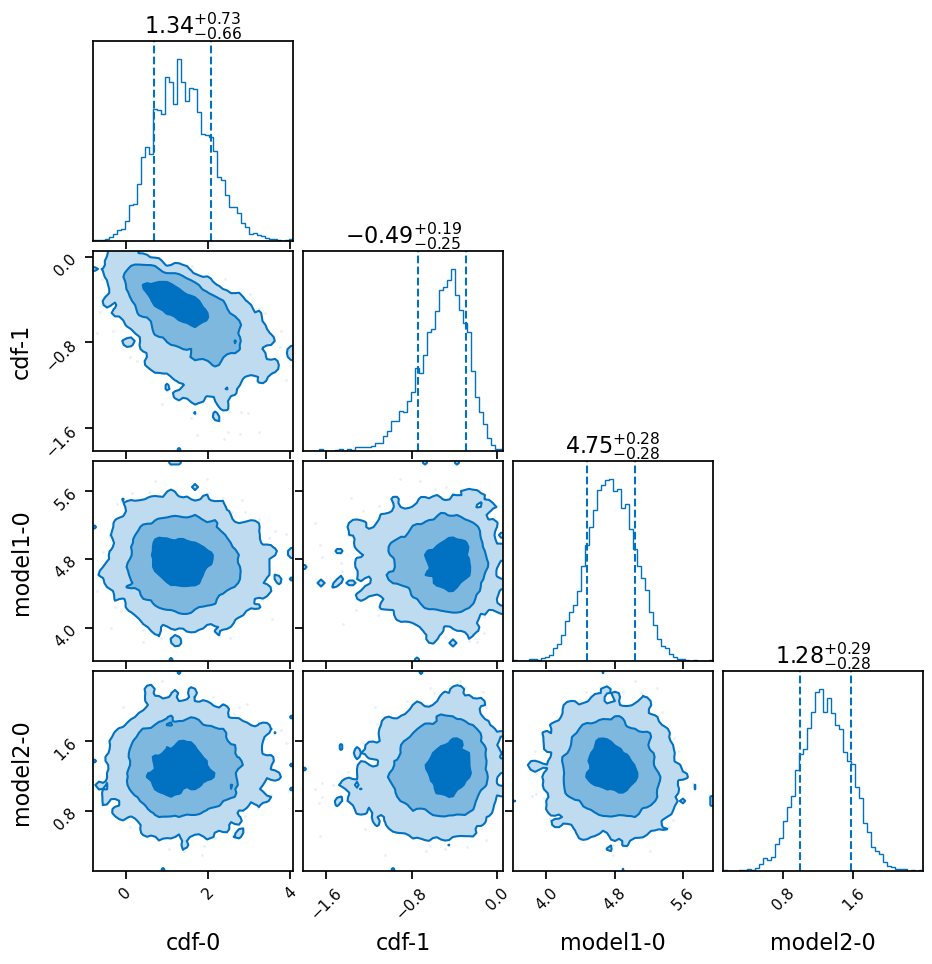

In [10]:
result.plot_corner()

### 4. Predictions

In [11]:
_,mean_prior,CI_prior, _ = mix_model.prior_predict(plot_g, CI=[5,20,80,95])
_,mean,CI, _ = mix_model.predict(plot_g, CI=[5,20,80,95])

(10000, 4)
using provided samples instead of posterior


In [12]:
per5, per20, per80, per95 = CI
prior5, prior20, prior80, prior95 = CI_prior

In [13]:
mix_model.map

array([ 3.06619357, -0.8465419 ,  4.71993961,  1.28918974])

In [14]:
# Map value prediction for the step mixing function parameter
model_params = [np.array(mix_model.map[2]), np.array(mix_model.map[3])]
map_prediction = mix_model.evaluate(mix_model.map[0:2], plot_g, model_params=model_params)

In [15]:
_,_,CI_weights,_=mix_model.predict_weights(plot_g, CI=[5,20, 80, 95])
perw_5, perw_20, perw_80, perw_95 = CI_weights

(5020, 100)


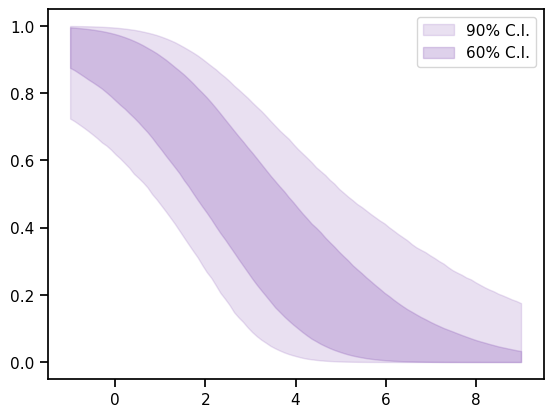

In [16]:
%matplotlib inline
fig, ax = plt.subplots()
ax.fill_between(plot_g,perw_5,perw_95,color=sns.color_palette()[4], alpha=0.2, label='90% C.I.')
ax.fill_between(plot_g,perw_20,perw_80, color=sns.color_palette()[4], alpha=0.3, label='60% C.I.')
ax.legend()
#ax.plot(plot_g, true_output[0], label='truth')
#ax.set_ylim(1.2,3.2)

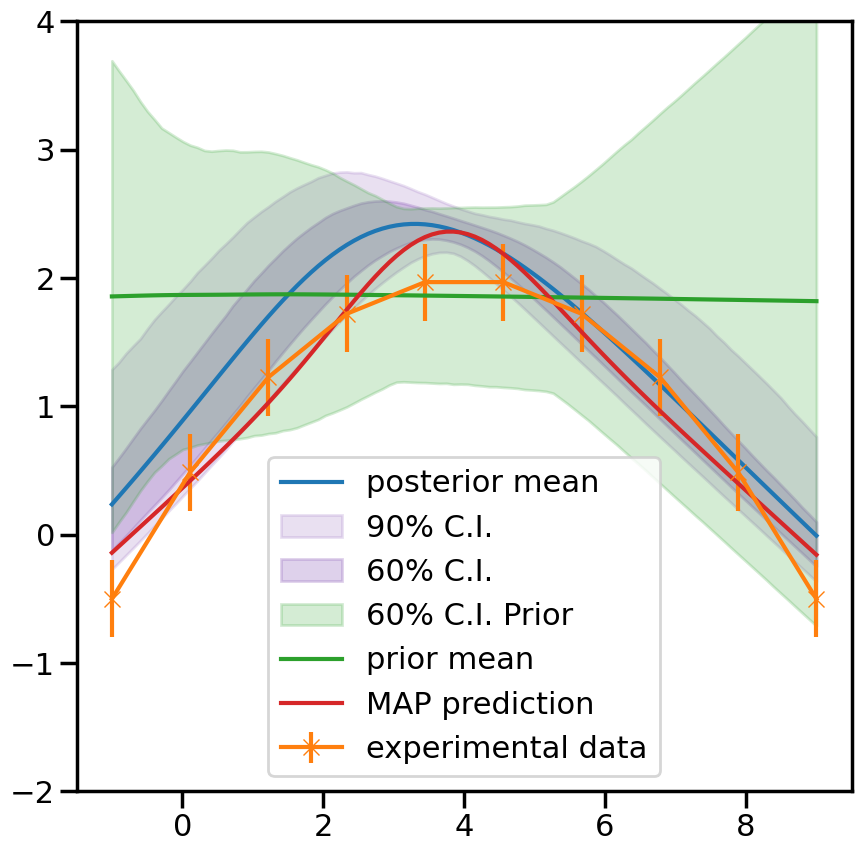

In [17]:
%matplotlib inline
sns.set_context('poster')
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(plot_g, mean, label='posterior mean')
ax.fill_between(plot_g,per5,per95,color=sns.color_palette()[4], alpha=0.2, label='90% C.I.')
ax.fill_between(plot_g,per20,per80, color=sns.color_palette()[4], alpha=0.3, label='60% C.I.')
ax.fill_between(plot_g,prior20,prior80,color=sns.color_palette()[2], alpha=0.2, label='60% C.I. Prior')
ax.errorbar(g,exp_data[0],yerr=exp_data[1], marker='x', label='experimental data')
ax.plot(plot_g, mean_prior, label='prior mean')
ax.plot(plot_g, map_prediction.flatten(), label='MAP prediction')
ax.set_ybound(-2,4)
ax.legend()